<a href="https://colab.research.google.com/github/ockayy/forecasting-Budget/blob/main/budgeting_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**
* data is right skewwed which is good as not many people are earning high which makes dataset realistic

   monthly_income  desired_savings_goal  day_of_week  day_of_month  \
0           60000          23662.089750            6             1   
1           50000          10501.977630            0             2   
2           40000          14225.725550            1             3   
3           40000           9455.391578            2             4   
4           60000          29944.134320            3             5   

         Spent        category  cumulative_spent    remaining  
0  5746.151202  food and drink       5746.151202  54253.84880  
1  4163.895355         medical       9910.046557  40089.95344  
2   289.086836       transport      10199.133390  29800.86661  
3  2762.804158         medical      12961.937550  27038.06245  
4  3204.166382         medical      16166.103930  43833.89607  
       monthly_income  desired_savings_goal  day_of_week  day_of_month  \
count     4000.000000           4000.000000  4000.000000   4000.000000   
mean     74185.000000          22066.672164    

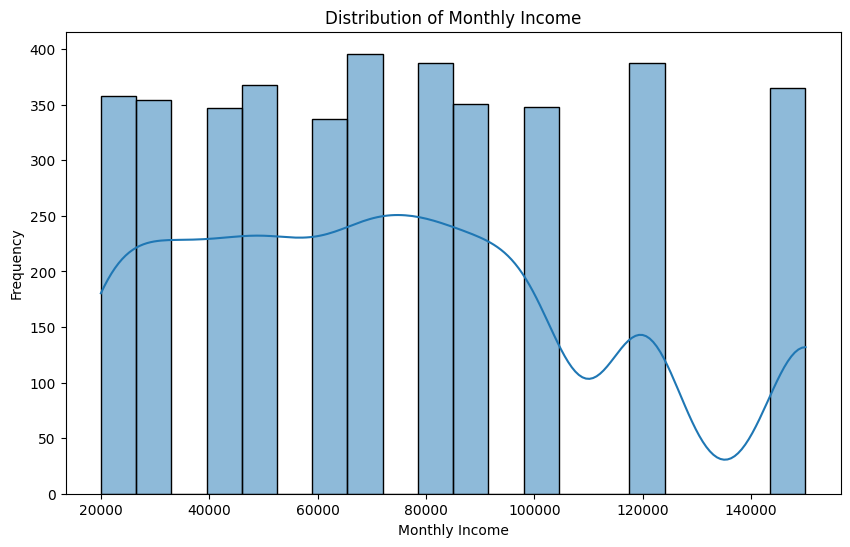

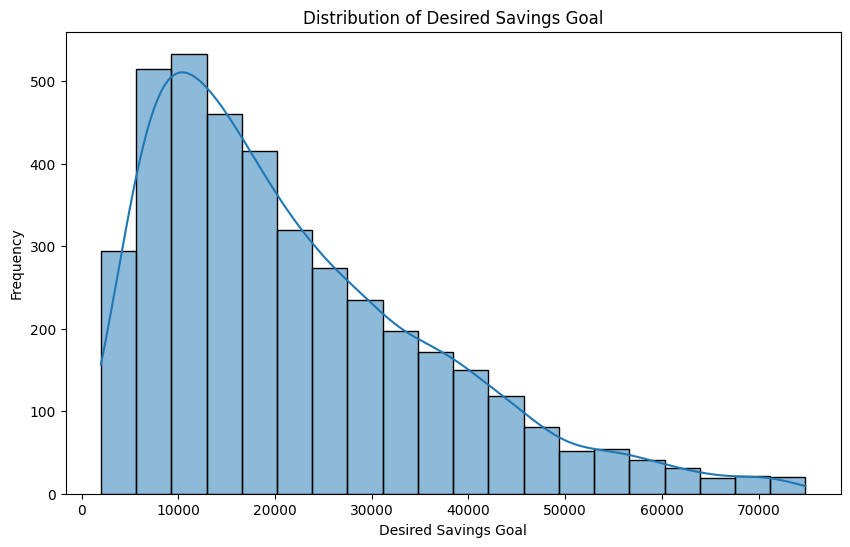

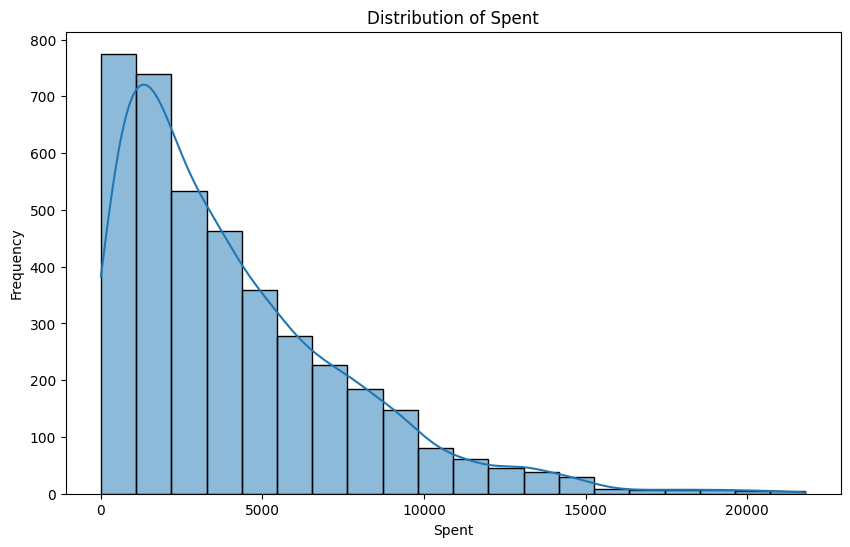

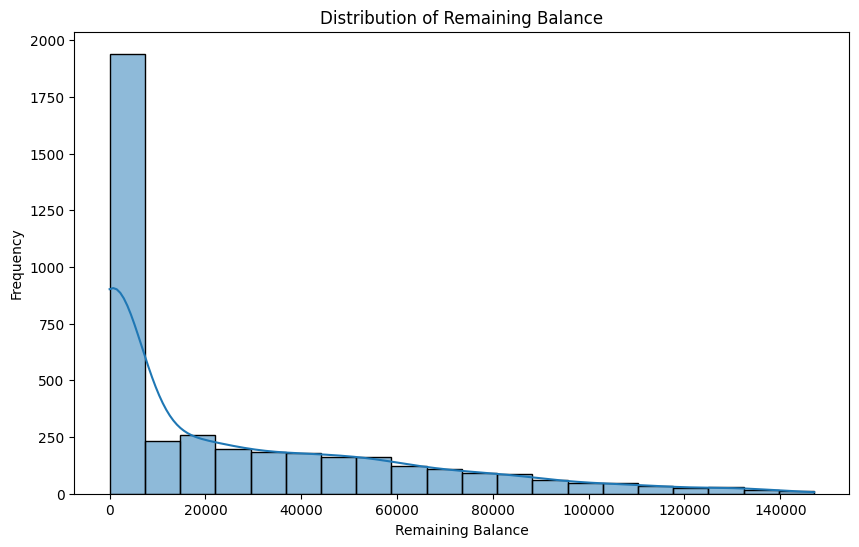

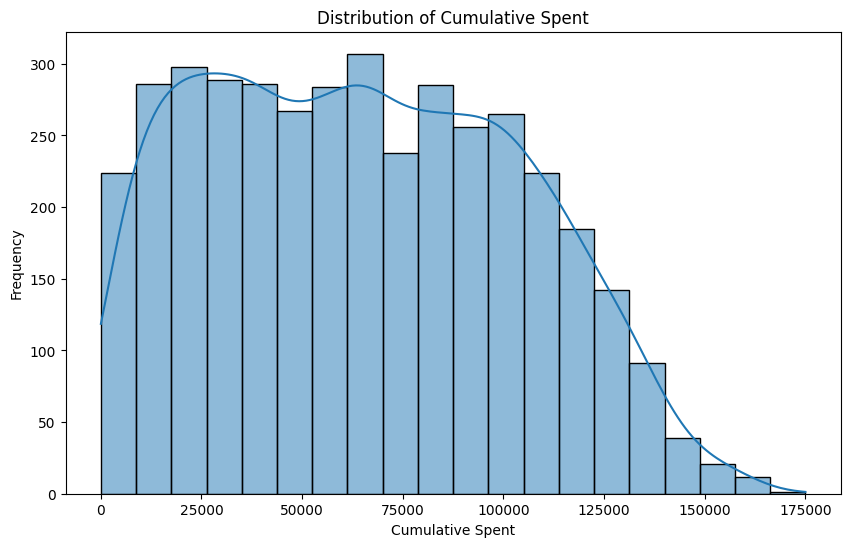

Skewness of Monthly Income: 0.449613691745671
Skewness of Desired Savings Goal: 1.0531967662380617
Skewness of Spent: 1.3829639906190436
Skewness of Remaining: 1.3343422176418467
Skewness of Cumulative Spent: 0.20153247591784024


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
print(df.describe())

# Visualize the distribution of 'monthly_income'
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_income'], bins=20, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'desired_savings_goal'
plt.figure(figsize=(10, 6))
sns.histplot(df['desired_savings_goal'], bins=20, kde=True)
plt.title('Distribution of Desired Savings Goal')
plt.xlabel('Desired Savings Goal')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Spent'
plt.figure(figsize=(10, 6))
sns.histplot(df['Spent'], bins=20, kde=True)
plt.title('Distribution of Spent')
plt.xlabel('Spent')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'remaining'
plt.figure(figsize=(10, 6))
sns.histplot(df['remaining'], bins=20, kde=True)
plt.title('Distribution of Remaining Balance')
plt.xlabel('Remaining Balance')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'cumulative_spent'
plt.figure(figsize=(10, 6))
sns.histplot(df['cumulative_spent'], bins=20, kde=True)
plt.title('Distribution of Cumulative Spent')
plt.xlabel('Cumulative Spent')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
print(f"Skewness of Monthly Income: {df['monthly_income'].skew()}")
print(f"Skewness of Desired Savings Goal: {df['desired_savings_goal'].skew()}")
print(f"Skewness of Spent: {df['Spent'].skew()}")
print(f"Skewness of Remaining: {df['remaining'].skew()}")
print(f"Skewness of Cumulative Spent: {df['cumulative_spent'].skew()}")


# **GRID SEARCH on Random Forest**

* Better but taking too much of a time.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare features and target variable
X = df[['monthly_income', 'desired_savings_goal', 'day_of_week', 'day_of_month', 'Spent', 'category', 'cumulative_spent']]
X = pd.get_dummies(X, columns=['category'], drop_first=True)  # One-hot encode categorical variables
y = df['remaining']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


# **RANDOM SEARCH RF**
* Less resources taking approach.
* faster training
* extracting best feature from data

**About output matrix**
* This is a very high R² value, suggesting that the model fits the data very well. approximately 98.02%
* This is a relatively small error given the scale of the remaining balance values.


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Prepare features and target variable
X = df[['monthly_income', 'desired_savings_goal', 'day_of_week', 'day_of_month', 'Spent', 'category', 'cumulative_spent']]
X = pd.get_dummies(X, columns=['category'], drop_first=True)  # One-hot encode categorical variables
y = df['remaining']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Perform Random Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Mean Absolute Error: 3149.1344455944836
R-squared: 0.9801760337788232


* Training the data on previously extracted best features.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare features and target variable
X = df[['monthly_income', 'desired_savings_goal', 'day_of_week', 'day_of_month', 'Spent', 'category', 'cumulative_spent']]
X = pd.get_dummies(X, columns=['category'], drop_first=True)  # One-hot encode categorical variables
y = df['remaining']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the final model with the best parameters
best_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 3149.1344455944836
R-squared: 0.9801760337788232


Mean Squared Error: 22183863.94314281


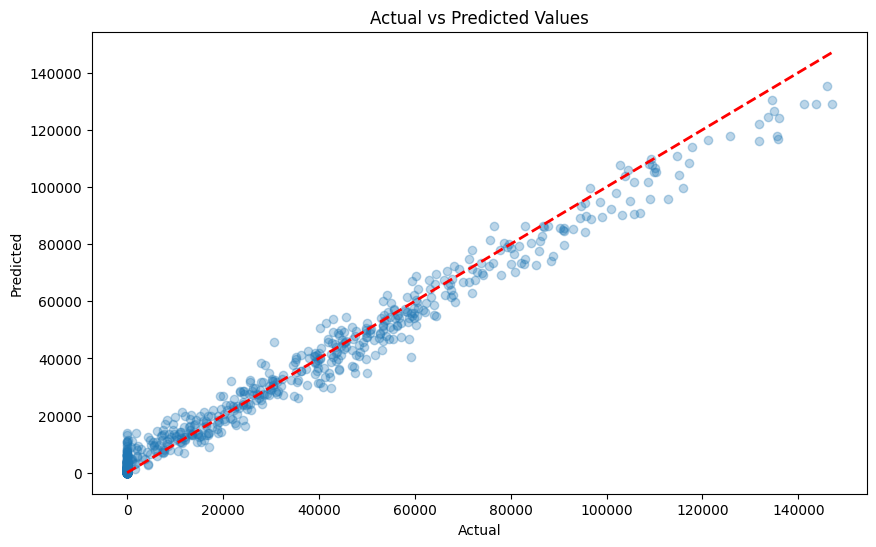

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


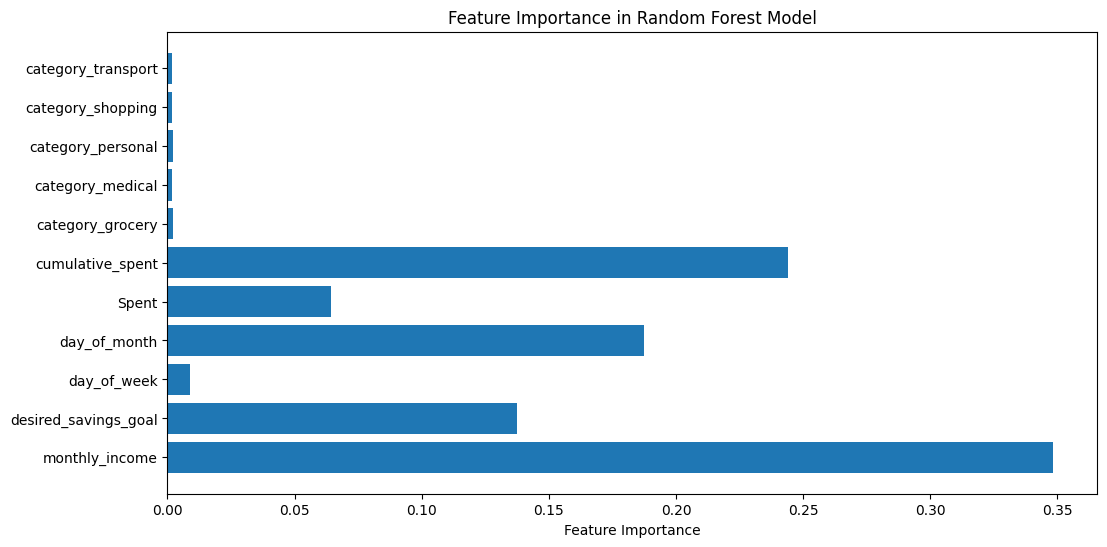

In [6]:
# Feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


# **Validation test on Unseen data**
* metrics tell that it performs reliably.
*   The individual MAE scores for each fold are relatively close to each other, ranging from approximately 2861.57 to 3228.20
* This indicates that the model generalizes well and is not overfitting to the training data.
* This means that, on average, the model's predictions are off by about 3028.64 units of currency, which is a good level of accuracy.
* source: Chatgpt



In [7]:
from sklearn.model_selection import cross_val_score

# Prepare features and target variable
X = df[['monthly_income', 'desired_savings_goal', 'day_of_week', 'day_of_month', 'Spent', 'category', 'cumulative_spent']]
X = pd.get_dummies(X, columns=['category'], drop_first=True)  # One-hot encode categorical variables
y = df['remaining']

# Define the model with the best parameters
best_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive and print
cv_scores = -cv_scores
print(f"Cross-Validation MAE Scores: {cv_scores}")
print(f"Mean Cross-Validation MAE: {cv_scores.mean()}")


Cross-Validation MAE Scores: [2861.57351305 3046.62334113 3228.20234529 2961.58245882 3045.22371473]
Mean Cross-Validation MAE: 3028.6410746031916


In [8]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target variable
X = df[['monthly_income', 'desired_savings_goal', 'day_of_week', 'day_of_month', 'Spent', 'category', 'cumulative_spent']]
X = pd.get_dummies(X, columns=['category'], drop_first=True)  # One-hot encode categorical variables
y = df['remaining']

# Train the final model with the best parameters on the entire dataset
final_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, random_state=42)
final_rf.fit(X, y)

# Save the final model to a file
model_filename = 'forecasting_model.pkl'
joblib.dump(final_rf, model_filename)
print(f"Final model saved to {model_filename}")


Final model saved to forecasting_model.pkl


# **Using model for prediction**

Ver: 1.0,
* previous data output works fine.
month days showing up correctly.
* works fine for both Yes and No inputs
* Issue: Not plotting prediction on the same graph, only showing current pattern


Enter your monthly income: 82133
Enter your desired savings goal: 12312
Do you have previous spending data? (yes/no): no
To achieve your savings goal of 12312.00 PKR, you need to spend approximately 0.00 PKR per day for the remaining 0 days.


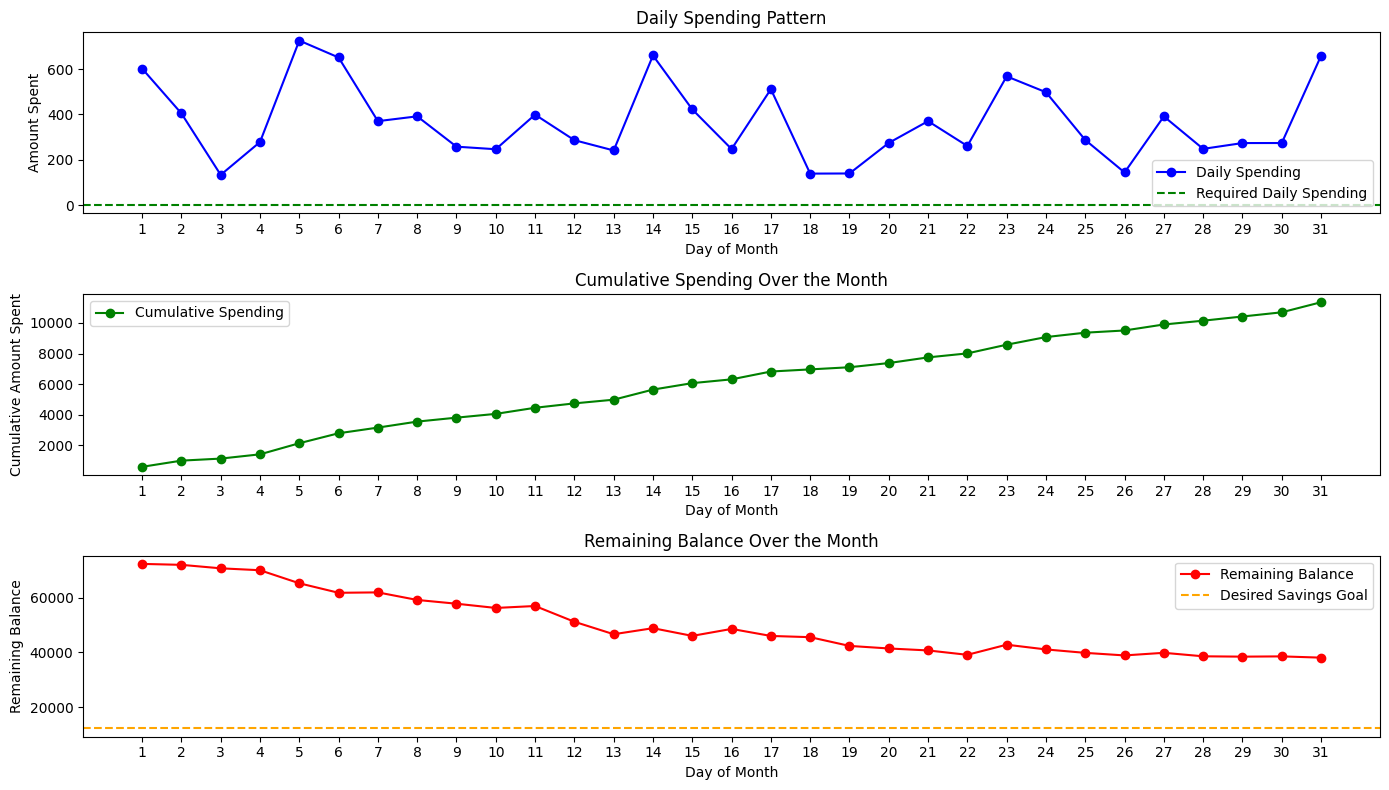

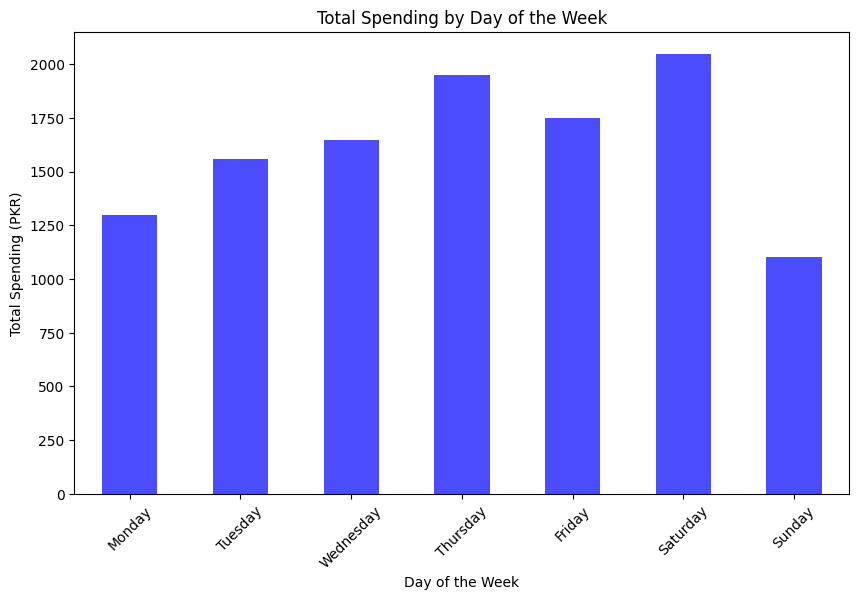

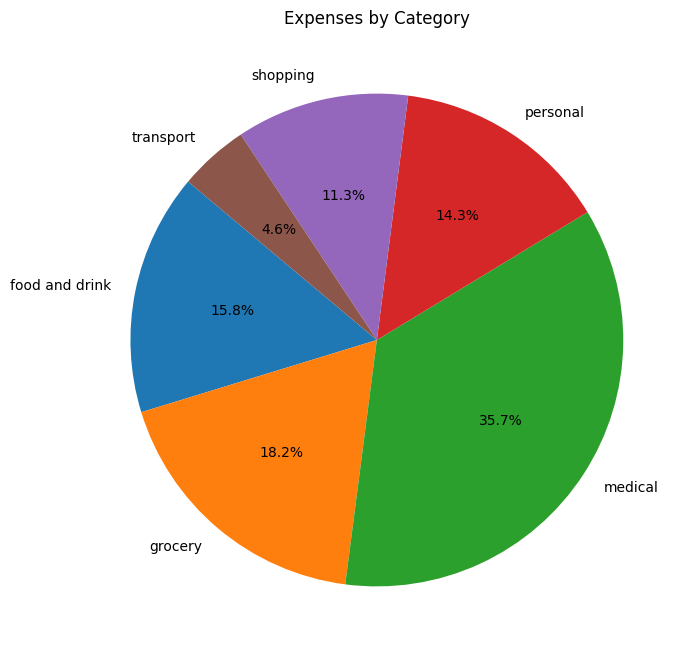

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta

# Load the final model
model_filename = 'forecasting_model.pkl'
final_rf = joblib.load(model_filename)

# Function to determine the number of days in a month
def days_in_month(year, month):
    if month == 12:
        return 31
    next_month = datetime(year, month + 1, 1)
    return (next_month - timedelta(days=1)).day

# Function to generate average spending data
def generate_spending_data(monthly_income, year, month):
    num_days = days_in_month(year, month)
    # Typical percentage of income spent on different categories
    category_distribution = {
        'shopping': 0.15,
        'grocery': 0.25,
        'transport': 0.1,
        'food and drink': 0.2,
        'medical': 0.05,
        'personal': 0.1,
        'other': 0.15
    }

    # Generate daily spending amounts
    daily_spending = []
    for day in range(1, num_days + 1):
        # Estimate daily spend based on category percentage
        base_spent = (monthly_income * np.random.choice(list(category_distribution.values()))) / num_days
        # Add randomness to simulate more realistic spending
        spent = base_spent * np.random.uniform(0.9, 1.1)  # Controlled range for realism
        category = np.random.choice(list(category_distribution.keys()))
        daily_spending.append({
            'day_of_week': (datetime(year, month, day).weekday()),
            'day_of_month': day,
            'Spent': spent,
            'category': category
        })

    return daily_spending

# Function to prepare data for prediction
def prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending):
    df = pd.DataFrame(daily_spending)
    df['monthly_income'] = monthly_income
    df['desired_savings_goal'] = desired_savings_goal
    df['cumulative_spent'] = df['Spent'].cumsum()

    # One-hot encode the 'category' column if it exists
    if 'category' in df.columns:
        df = pd.get_dummies(df, columns=['category'], drop_first=True)

    # Get the columns the model was trained on
    trained_columns = final_rf.feature_names_in_

    # Add missing columns (if any) and fill with 0
    for col in trained_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure the order of columns matches the training data
    df = df[trained_columns]

    return df

# Function to get user input for spending data
def get_user_spending_data(num_days):
    daily_spending = []
    current_date = datetime.now()

    for day_offset in range(1, num_days + 1):  # Start from 1 to exclude today
        day = current_date - timedelta(days=day_offset)
        print(f"Day {day.strftime('%Y-%m-%d')}:")
        spent = float(input("Enter amount spent: "))

        daily_spending.append({
            'day_of_week': day.weekday(),
            'day_of_month': day.day,
            'Spent': spent
        })

    daily_spending.reverse()  # Reverse to have the oldest day first
    return daily_spending

def plot_expenses_pie_chart(daily_spending):
    df = pd.DataFrame(daily_spending)
    if 'category' in df.columns:
        category_totals = df.groupby('category')['Spent'].sum()

        plt.figure(figsize=(8, 8))
        category_totals.plot.pie(autopct='%1.1f%%', startangle=140)
        plt.title('Expenses by Category')
        plt.ylabel('')
        plt.show()

def plot_spending_by_day_histogram(daily_spending):
    df = pd.DataFrame(daily_spending)
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_name'] = df['day_of_week'].apply(lambda x: day_names[x])
    spending_by_day = df.groupby('day_name')['Spent'].sum()

    plt.figure(figsize=(10, 6))
    spending_by_day.reindex(day_names).plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Total Spending by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Spending (PKR)')
    plt.xticks(rotation=45)
    plt.show()

# Function to calculate required daily spending
def calculate_required_daily_spending(monthly_income, desired_savings_goal, num_days):
    required_daily_savings = desired_savings_goal / num_days
    required_daily_spending = (monthly_income - desired_savings_goal) / num_days
    return required_daily_spending

# Main function to handle user interaction and prediction
def main():
    # User input for monthly income and savings goal
    monthly_income = float(input("Enter your monthly income: "))
    desired_savings_goal = float(input("Enter your desired savings goal: "))

    # Ask if the user has previous spending data
    has_previous_data = input("Do you have previous spending data? (yes/no): ").strip().lower()

    if has_previous_data == 'yes':
        # Ask for how many days of data
        num_days = int(input("How many days of previous data do you have? "))
        # Get user spending data for the specified number of days
        daily_spending = get_user_spending_data(num_days)
    else:
        # Determine current year and month
        current_date = datetime.now()
        year = current_date.year
        month = current_date.month
        # Simulate spending data for the entire month
        daily_spending = generate_spending_data(monthly_income, year, month)
        num_days = len(daily_spending)

    # Prepare data for prediction
    input_data = prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending)

    # Predict the remaining balance
    predicted_remaining = final_rf.predict(input_data)

    # Add predicted remaining balance to the input data
    input_data['remaining'] = predicted_remaining

    # Calculate required daily spending
    required_daily_spending = calculate_required_daily_spending(monthly_income, desired_savings_goal, num_days)

    # Provide user with required spending information
    total_spent = input_data['Spent'].sum()
    remaining_days = num_days - len(input_data)
    realistic_daily_spending = (monthly_income - total_spent - desired_savings_goal) / remaining_days if remaining_days > 0 else 0
    print(f"To achieve your savings goal of {desired_savings_goal:.2f} PKR, you need to spend approximately {realistic_daily_spending:.2f} PKR per day for the remaining {remaining_days} days.")

    # Plotting the spending pattern and remaining balance
    plt.figure(figsize=(14, 8))

    # Daily Spending
    plt.subplot(3, 1, 1)
    plt.plot(input_data['day_of_month'], input_data['Spent'], marker='o', linestyle='-', color='blue', label='Daily Spending')
    plt.axhline(y=realistic_daily_spending, color='green', linestyle='--', label='Required Daily Spending')
    plt.title('Daily Spending Pattern')
    plt.xlabel('Day of Month')
    plt.ylabel('Amount Spent')
    plt.xticks(ticks=np.arange(1, days_in_month(datetime.now().year, datetime.now().month) + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    # Cumulative Spending
    plt.subplot(3, 1, 2)
    plt.plot(input_data['day_of_month'], input_data['cumulative_spent'], marker='o', linestyle='-', color='green', label='Cumulative Spending')
    plt.title('Cumulative Spending Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Cumulative Amount Spent')
    plt.xticks(ticks=np.arange(1, days_in_month(datetime.now().year, datetime.now().month) + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    # Remaining Balance
    plt.subplot(3, 1, 3)
    plt.plot(input_data['day_of_month'], input_data['remaining'], marker='o', linestyle='-', color='red', label='Remaining Balance')
    plt.axhline(y=desired_savings_goal, color='orange', linestyle='--', label='Desired Savings Goal')
    plt.title('Remaining Balance Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Remaining Balance')
    plt.xticks(ticks=np.arange(1, days_in_month(datetime.now().year, datetime.now().month) + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    plt.tight_layout()
    plt.show()

    plot_spending_by_day_histogram(daily_spending)
    plot_expenses_pie_chart(daily_spending)

if __name__ == "__main__":
    main()

# **V.2**

Enter your monthly income: 50000
Enter your desired savings goal: 10000
Do you have previous spending data? (yes/no): yes
How many days of previous data do you have? 10
Day 2024-08-11:
Enter amount spent: 200
Day 2024-08-10:
Enter amount spent: 200
Day 2024-08-09:
Enter amount spent: 350
Day 2024-08-08:
Enter amount spent: 6500
Day 2024-08-07:
Enter amount spent: 324
Day 2024-08-06:
Enter amount spent: 577
Day 2024-08-05:
Enter amount spent: 7897
Day 2024-08-04:
Enter amount spent: 1000
Day 2024-08-03:
Enter amount spent: 1500
Day 2024-08-02:
Enter amount spent: 677
To achieve your savings goal of 10000.00 PKR, you need to spend approximately 747.78 PKR per day for the remaining 21 days.


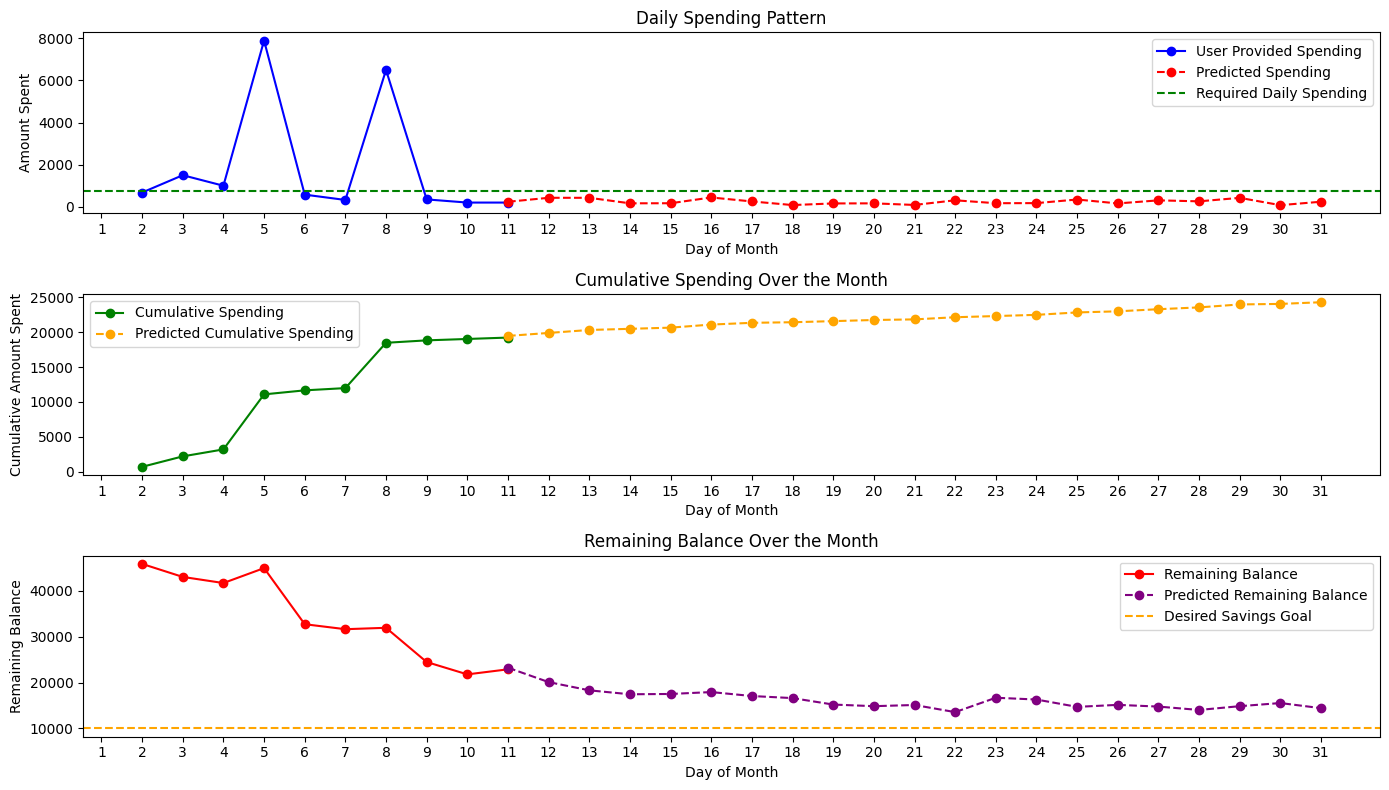

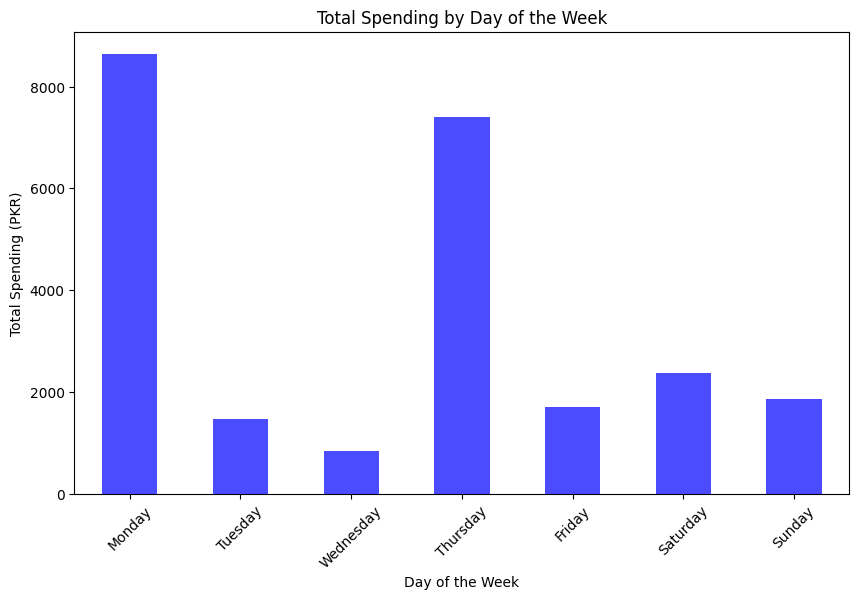

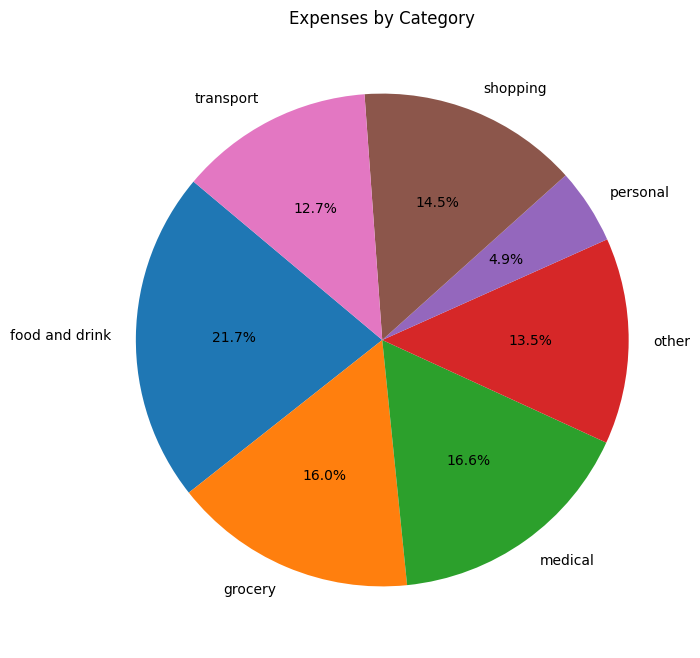

5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta

# Load the final model
model_filename = 'forecasting_model.pkl'
final_rf = joblib.load(model_filename)

# Function to determine the number of days in a month
def days_in_month(year, month):
    if month == 12:
        return 31
    next_month = datetime(year, month + 1, 1)
    return (next_month - timedelta(days=1)).day

# Function to generate average spending data
def generate_spending_data(monthly_income, year, month, start_day=1):
    num_days = days_in_month(year, month)
    # Typical percentage of income spent on different categories
    category_distribution = {
        'shopping': 0.15,
        'grocery': 0.25,
        'transport': 0.1,
        'food and drink': 0.2,
        'medical': 0.05,
        'personal': 0.1,
        'other': 0.15
    }

    # Generate daily spending amounts
    daily_spending = []
    for day in range(start_day, num_days + 1):
        # Estimate daily spend based on category percentage
        base_spent = (monthly_income * np.random.choice(list(category_distribution.values()))) / num_days
        # Add randomness to simulate more realistic spending
        spent = base_spent * np.random.uniform(0.9, 1.1)  # Controlled range for realism
        category = np.random.choice(list(category_distribution.keys()))
        daily_spending.append({
            'day_of_week': (datetime(year, month, day).weekday()),
            'day_of_month': day,
            'Spent': spent,
            'category': category
        })

    return daily_spending

# Function to prepare data for prediction
def prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending):
    df = pd.DataFrame(daily_spending)
    df['monthly_income'] = monthly_income
    df['desired_savings_goal'] = desired_savings_goal
    df['cumulative_spent'] = df['Spent'].cumsum()

    # One-hot encode the 'category' column if it exists
    if 'category' in df.columns:
        df = pd.get_dummies(df, columns=['category'], drop_first=True)

    # Get the columns the model was trained on
    trained_columns = final_rf.feature_names_in_

    # Add missing columns (if any) and fill with 0
    for col in trained_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure the order of columns matches the training data
    df = df[trained_columns]

    return df

# Function to get user input for spending data
def get_user_spending_data(num_days):
    daily_spending = []
    current_date = datetime.now()

    for day_offset in range(1, num_days + 1):  # Start from 1 to exclude today
        day = current_date - timedelta(days=day_offset)
        print(f"Day {day.strftime('%Y-%m-%d')}:")
        spent = float(input("Enter amount spent: "))

        daily_spending.append({
            'day_of_week': day.weekday(),
            'day_of_month': day.day,
            'Spent': spent
        })

    daily_spending.reverse()  # Reverse to have the oldest day first
    return daily_spending

def plot_expenses_pie_chart(daily_spending):
    df = pd.DataFrame(daily_spending)
    if 'category' in df.columns:
        category_totals = df.groupby('category')['Spent'].sum()

        plt.figure(figsize=(8, 8))
        category_totals.plot.pie(autopct='%1.1f%%', startangle=140)
        plt.title('Expenses by Category')
        plt.ylabel('')
        plt.show()

def plot_spending_by_day_histogram(daily_spending):
    df = pd.DataFrame(daily_spending)
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_name'] = df['day_of_week'].apply(lambda x: day_names[x])
    spending_by_day = df.groupby('day_name')['Spent'].sum()

    plt.figure(figsize=(10, 6))
    spending_by_day.reindex(day_names).plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Total Spending by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Spending (PKR)')
    plt.xticks(rotation=45)
    plt.show()

# Function to calculate required daily spending
def calculate_required_daily_spending(monthly_income, desired_savings_goal, total_days, spent_days):
    remaining_days = total_days - spent_days
    required_daily_spending = (monthly_income - desired_savings_goal) / total_days
    return required_daily_spending, remaining_days

# Main function to handle user interaction and prediction
def main():
    # User input for monthly income and savings goal
    monthly_income = float(input("Enter your monthly income: "))
    desired_savings_goal = float(input("Enter your desired savings goal: "))

    # Ask if the user has previous spending data
    has_previous_data = input("Do you have previous spending data? (yes/no): ").strip().lower()

    if has_previous_data == 'yes':
        # Ask for how many days of data
        num_days = int(input("How many days of previous data do you have? "))
        # Get user spending data for the specified number of days
        daily_spending = get_user_spending_data(num_days)
    else:
        num_days = 0
        daily_spending = []

    # Add predicted spending for the remaining days
    current_date = datetime.now()
    year = current_date.year
    month = current_date.month
    start_day = len(daily_spending) + 1

    predicted_spending = generate_spending_data(monthly_income, year, month, start_day)
    daily_spending.extend(predicted_spending)

    # Prepare data for prediction
    input_data = prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending)

    # Predict the remaining balance
    predicted_remaining = final_rf.predict(input_data)

    # Add predicted remaining balance to the input data
    input_data['remaining'] = predicted_remaining

    # Calculate required daily spending
    total_days = days_in_month(year, month)
    spent_days = num_days
    remaining_days = total_days - spent_days

    realistic_daily_spending = (monthly_income - input_data['Spent'].sum() - desired_savings_goal) / remaining_days if remaining_days > 0 else 0
    print(f"To achieve your savings goal of {desired_savings_goal:.2f} PKR, you need to spend approximately {realistic_daily_spending:.2f} PKR per day for the remaining {remaining_days} days.")

    # Plotting the spending pattern and remaining balance
    user_provided_data = input_data[:spent_days]
    predicted_data = input_data[spent_days:]

    # Plotting the spending pattern and remaining balance
    plt.figure(figsize=(14, 8))

    # Daily Spending
    plt.subplot(3, 1, 1)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['Spent'], marker='o', linestyle='-', color='blue', label='User Provided Spending')
    plt.plot(predicted_data['day_of_month'], predicted_data['Spent'], marker='o', linestyle='--', color='red', label='Predicted Spending')
    plt.axhline(y=realistic_daily_spending, color='green', linestyle='--', label='Required Daily Spending')
    plt.title('Daily Spending Pattern')
    plt.xlabel('Day of Month')
    plt.ylabel('Amount Spent')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    # Cumulative Spending
    plt.subplot(3, 1, 2)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['cumulative_spent'], marker='o', linestyle='-', color='green', label='Cumulative Spending')
    plt.plot(predicted_data['day_of_month'], predicted_data['cumulative_spent'], marker='o', linestyle='--', color='orange', label='Predicted Cumulative Spending')
    plt.title('Cumulative Spending Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Cumulative Amount Spent')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()


    # Remaining Balance
    plt.subplot(3, 1, 3)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['remaining'], marker='o', linestyle='-', color='red', label='Remaining Balance')
    plt.plot(predicted_data['day_of_month'], predicted_data['remaining'], marker='o', linestyle='--', color='purple', label='Predicted Remaining Balance')
    plt.axhline(y=desired_savings_goal, color='orange', linestyle='--', label='Desired Savings Goal')
    plt.title('Remaining Balance Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Remaining Balance')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    plt.tight_layout()
    plt.show()

    plot_spending_by_day_histogram(daily_spending)
    plot_expenses_pie_chart(daily_spending)

if __name__ == "__main__":
    main()
5

Enter your monthly income: 50000
Enter your desired savings goal: 10000
Do you have previous spending data? (yes/no): yes
How many days of previous data do you have? 5
Day 2024-08-11:
Enter amount spent: 750
Day 2024-08-10:
Enter amount spent: 750
Day 2024-08-09:
Enter amount spent: 750
Day 2024-08-08:
Enter amount spent: 1000
Day 2024-08-07:
Enter amount spent: 2000
To achieve your savings goal of 10000.00 PKR, you need to spend approximately 1109.71 PKR per day for the remaining 26 days.


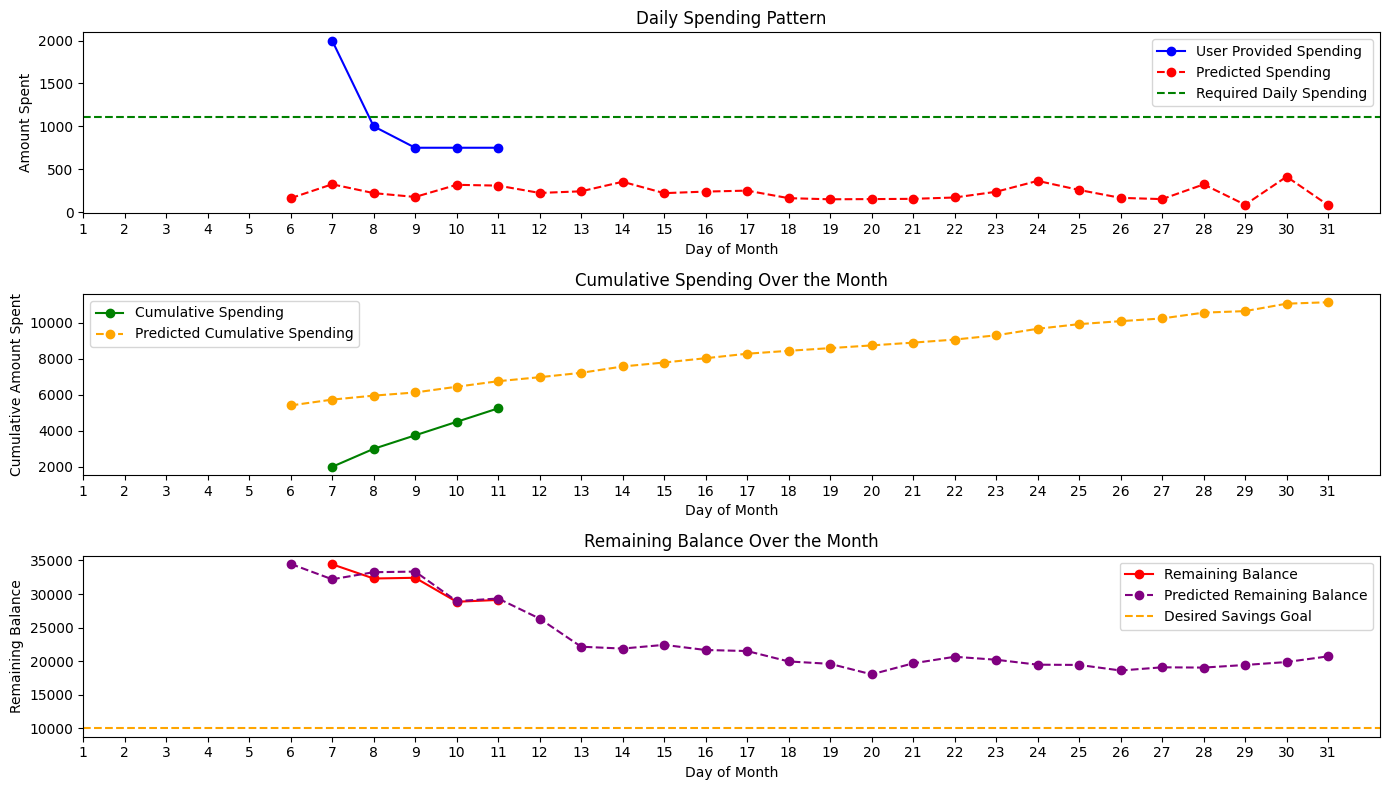

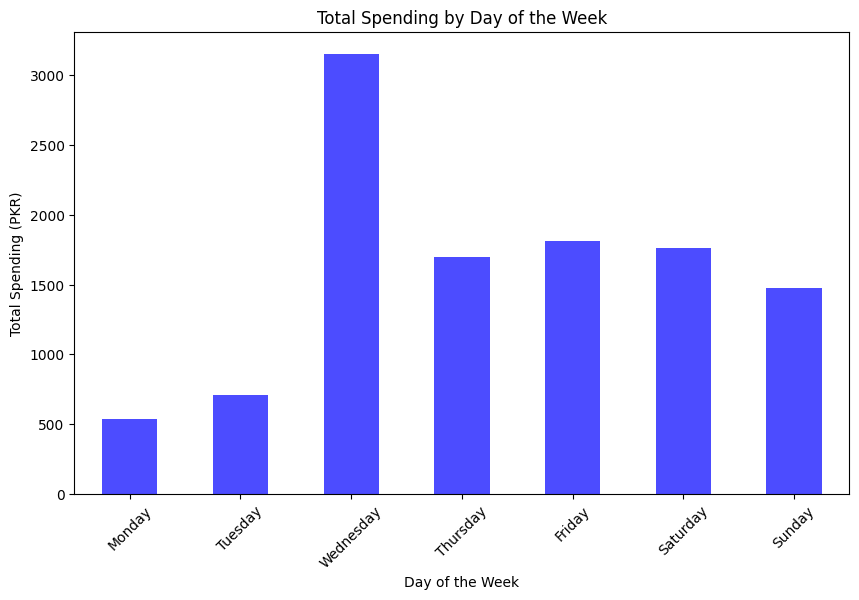

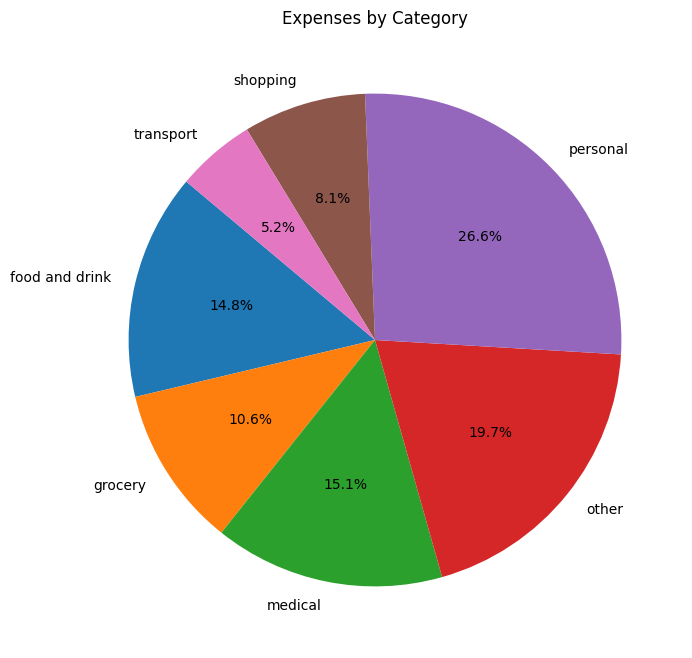

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta

# Load the final model
model_filename = 'forecasting_model.pkl'
final_rf = joblib.load(model_filename)

# Function to determine the number of days in a month
def days_in_month(year, month):
    if month == 12:
        return 31
    next_month = datetime(year, month + 1, 1)
    return (next_month - timedelta(days=1)).day

# Function to generate average spending data
def generate_spending_data(monthly_income, year, month, start_day=1):
    num_days = days_in_month(year, month)
    # Typical percentage of income spent on different categories
    category_distribution = {
        'shopping': 0.15,
        'grocery': 0.25,
        'transport': 0.1,
        'food and drink': 0.2,
        'medical': 0.05,
        'personal': 0.1,
        'other': 0.15
    }

    # Generate daily spending amounts
    daily_spending = []
    for day in range(start_day, num_days + 1):
        # Estimate daily spend based on category percentage
        base_spent = (monthly_income * np.random.choice(list(category_distribution.values()))) / num_days
        # Add randomness to simulate more realistic spending
        spent = base_spent * np.random.uniform(0.9, 1.1)  # Controlled range for realism
        category = np.random.choice(list(category_distribution.keys()))
        daily_spending.append({
            'day_of_week': (datetime(year, month, day).weekday()),
            'day_of_month': day,
            'Spent': spent,
            'category': category
        })

    return daily_spending

# Function to prepare data for prediction
def prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending):
    df = pd.DataFrame(daily_spending)
    df['monthly_income'] = monthly_income
    df['desired_savings_goal'] = desired_savings_goal
    df['cumulative_spent'] = df['Spent'].cumsum()

    # One-hot encode the 'category' column if it exists
    if 'category' in df.columns:
        df = pd.get_dummies(df, columns=['category'], drop_first=True)

    # Get the columns the model was trained on
    trained_columns = final_rf.feature_names_in_

    # Add missing columns (if any) and fill with 0
    for col in trained_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure the order of columns matches the training data
    df = df[trained_columns]

    return df

# Function to get user input for spending data
def get_user_spending_data(num_days):
    daily_spending = []
    current_date = datetime.now()

    for day_offset in range(1, num_days + 1):  # Start from 1 to exclude today
        day = current_date - timedelta(days=day_offset)
        print(f"Day {day.strftime('%Y-%m-%d')}:")
        spent = float(input("Enter amount spent: "))

        daily_spending.append({
            'day_of_week': day.weekday(),
            'day_of_month': day.day,
            'Spent': spent
        })

    daily_spending.reverse()  # Reverse to have the oldest day first
    return daily_spending

def plot_expenses_pie_chart(daily_spending):
    df = pd.DataFrame(daily_spending)
    if 'category' in df.columns:
        category_totals = df.groupby('category')['Spent'].sum()

        plt.figure(figsize=(8, 8))
        category_totals.plot.pie(autopct='%1.1f%%', startangle=140)
        plt.title('Expenses by Category')
        plt.ylabel('')
        plt.show()

def plot_spending_by_day_histogram(daily_spending):
    df = pd.DataFrame(daily_spending)
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_name'] = df['day_of_week'].apply(lambda x: day_names[x])
    spending_by_day = df.groupby('day_name')['Spent'].sum()

    plt.figure(figsize=(10, 6))
    spending_by_day.reindex(day_names).plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Total Spending by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Spending (PKR)')
    plt.xticks(rotation=45)
    plt.show()

# Function to calculate required daily spending
def calculate_required_daily_spending(monthly_income, desired_savings_goal, total_days, spent_days):
    remaining_days = total_days - spent_days
    required_daily_spending = (monthly_income - desired_savings_goal) / total_days
    return required_daily_spending, remaining_days

# Main function to handle user interaction and prediction
def main():
    # User input for monthly income and savings goal
    monthly_income = float(input("Enter your monthly income: "))
    desired_savings_goal = float(input("Enter your desired savings goal: "))

    # Ask if the user has previous spending data
    has_previous_data = input("Do you have previous spending data? (yes/no): ").strip().lower()

    if has_previous_data == 'yes':
        # Ask for how many days of data
        num_days = int(input("How many days of previous data do you have? "))
        # Get user spending data for the specified number of days
        daily_spending = get_user_spending_data(num_days)
    else:
        num_days = 0
        daily_spending = []

    # Add predicted spending for the remaining days
    current_date = datetime.now()
    year = current_date.year
    month = current_date.month
    start_day = len(daily_spending) + 1

    predicted_spending = generate_spending_data(monthly_income, year, month, start_day)
    daily_spending.extend(predicted_spending)

    # Prepare data for prediction
    input_data = prepare_data_for_prediction(monthly_income, desired_savings_goal, daily_spending)

    # Predict the remaining balance
    predicted_remaining = final_rf.predict(input_data)

    # Add predicted remaining balance to the input data
    input_data['remaining'] = predicted_remaining

    # Calculate required daily spending
    total_days = days_in_month(year, month)
    spent_days = num_days
    remaining_days = total_days - spent_days

    realistic_daily_spending = (monthly_income - input_data['Spent'].sum() - desired_savings_goal) / remaining_days if remaining_days > 0 else 0
    print(f"To achieve your savings goal of {desired_savings_goal:.2f} PKR, you need to spend approximately {realistic_daily_spending:.2f} PKR per day for the remaining {remaining_days} days.")

    # Plotting the spending pattern and remaining balance
    user_provided_data = input_data[:spent_days]
    predicted_data = input_data[spent_days:]

    # Plotting the spending pattern and remaining balance
    plt.figure(figsize=(14, 8))

    # Daily Spending
    plt.subplot(3, 1, 1)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['Spent'], marker='o', linestyle='-', color='blue', label='User Provided Spending')
    plt.plot(predicted_data['day_of_month'], predicted_data['Spent'], marker='o', linestyle='--', color='red', label='Predicted Spending')
    plt.axhline(y=realistic_daily_spending, color='green', linestyle='--', label='Required Daily Spending')
    plt.title('Daily Spending Pattern')
    plt.xlabel('Day of Month')
    plt.ylabel('Amount Spent')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    # Cumulative Spending
    plt.subplot(3, 1, 2)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['cumulative_spent'], marker='o', linestyle='-', color='green', label='Cumulative Spending')
    plt.plot(predicted_data['day_of_month'], predicted_data['cumulative_spent'], marker='o', linestyle='--', color='orange', label='Predicted Cumulative Spending')
    plt.title('Cumulative Spending Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Cumulative Amount Spent')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()


    # Remaining Balance
    plt.subplot(3, 1, 3)
    plt.plot(user_provided_data['day_of_month'], user_provided_data['remaining'], marker='o', linestyle='-', color='red', label='Remaining Balance')
    plt.plot(predicted_data['day_of_month'], predicted_data['remaining'], marker='o', linestyle='--', color='purple', label='Predicted Remaining Balance')
    plt.axhline(y=desired_savings_goal, color='orange', linestyle='--', label='Desired Savings Goal')
    plt.title('Remaining Balance Over the Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Remaining Balance')
    plt.xticks(ticks=np.arange(1, total_days + 1, step=1))  # Ensure x-axis uses integer values
    plt.legend()

    plt.tight_layout()
    plt.show()

    plot_spending_by_day_histogram(daily_spending)
    plot_expenses_pie_chart(daily_spending)

if __name__ == "__main__":
    main()
